# Project: Multi-Objective Optimization

**Deadline**: <u>November 4, 2025 at 10:00 p.m.</u> (SGT)

## Guidelines for Submission

### A. Submission Package
1. Submit **one ZIP file per group** named **`EC_Group_<xy>.zip`**, where `<xy>` is your group number.  
   *Example:* `EC_Group_22.zip`
2. The ZIP must contain the following files:
   - **`CEG5302_Group_Project_<xy>.ipynb`** — your main Jupyter Notebook  
   - **`report_<xy>.pdf`** — your 2–3 page report  
   *Example:* `CEG5302_Group_Project_22.ipynb` and `report_22.pdf`

### B. General Requirements
1. Each group has **four members** and submits **only one** ZIP.  
2. The Jupyter Notebook must clearly display **Python 3 code** and its **generated results**.
3. The notebook must be **fully executable top-to-bottom** to reproduce all figures directly from code.  
   Do **not** insert external image files; all plots/images must be produced during execution.  
   <span style="color:red;">Files with the `.py` extension are not accepted.</span>
4. Before submitting, **rerun the entire notebook** to confirm it executes without errors.  
   Code that cannot be executed or produces errors will result in **point deductions**.

### C. File-Naming Examples
- Group 07 → `EC_Group_07.zip` → contains `CEG5302_Group_Project_07.ipynb`, `report_07.pdf`  


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1. Continuous Multi-Objective Optimization
In this part, we have implemented the two-objective ZDT3 problem [1] and the vehicle crashworthiness design problem [2], and provided examples on how to use them. <u>**Your task is to implement <span style="color:blue;">NSGA-II</span> and use it to solve these two problems**</u>.

[1] Zitzler, E., Deb, K., & Thiele, L. (2000). Comparison of multiobjective evolutionary algorithms: Empirical results. Evolutionary computation, 8(2), 173-195.

[2] Liao, X., Li, Q., Yang, X., Zhang, W., & Li, W. (2008). Multiobjective optimization for crash safety design of vehicles using a stepwise regression model. Structural and multidisciplinary optimization, 35, 561-569.

### Introduction to a Two-Objective Test Problem: ZDT3 
The ZDT test suite [1] is a well-known set of benchmark problems in multi-objective optimization. It was introduced by Zitzler, Deb, and Thiele in 2000 to evaluate the performance of multi-objective optimization algorithms. ZDT3 is one of the test problems in the ZDT test suite.

- Number of objectives: 2
- Number of decision variables: 30

$$
\begin{aligned}
&\mathrm{minimize} \left\{
\begin{array}{l}
f_1(\mathbf{x})=\mathbf{x} \\
f_2(\mathbf{x})=g(\mathbf{x}) h(\mathbf{x})
\end{array}\:,\right. \\
&\mathrm{where} \enspace g(\mathbf{x})=1+\frac{9}{n-1} \sum_{i=2}^n x_i, \\
& \qquad \enspace h(\mathbf{x})=1-\sqrt{f_1(\mathbf{x}) / g(\mathbf{x})}-\left(f_1(\mathbf{x}) / g(\mathbf{x})\right) \sin \left(10 \pi f_1(\mathbf{x})\right),\\
& \qquad \enspace 0 \leq x_i \leq 1, \enspace i=1,\ldots,n,.
\end{aligned}
$$

[1] E. Zitzler, K. Deb, and L. Thiele, Comparison of multiobjective evolutionary algorithms: Empirical results, Evolutionary computation, 2000, 8(2): 173-195.

In [ ]:
class ZDT3():

    def __init__(self):
        self.name = 'ZDT3'
        self.n_obj = 2  # number of objectives
        self.n_var = 30  # number of decision variables

        self.lower = np.zeros(self.n_var)  # lower bound of decision variables
        self.upper = np.ones(self.n_var)  # upper bound of decision variables

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj)) # for each chromosom, we have 2 objective function evals.
        f[:, 0] = x[:, 0]
        g = 1.0 + 9.0 * np.sum(x[:, 1:], axis=1) / (self.n_var - 1)
        h = 1 - np.power(
            f[:, 0] * 1.0 / g,
            0.5) - (f[:, 0] * 1.0 / g) * np.sin(10 * np.pi * f[:, 0])
        f[:, 1] = g * h

        return f

In [ ]:
# Create an instance of ZDT3
prob = ZDT3()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

Problem = ZDT3
Number of objectives = 2
Number of variables = 30
Lower bounds = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Upper bounds = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
# Initialize a population with 1 solution and evaluate it
pop_size = 1
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)

print(f"x: {x}")

f = prob.evaluate(x)
print(f"f(x) = {f}")


x: [[0.93693676 0.16532061 0.10205129 0.55404163 0.9797038  0.65638449
  0.44868288 0.38543203 0.27516358 0.92409187 0.38231994 0.65521084
  0.31697582 0.20447672 0.36916805 0.25436992 0.69788373 0.81432438
  0.07117927 0.62468147 0.79340788 0.30260543 0.32146685 0.26335243
  0.84109783 0.09368195 0.81464588 0.05356775 0.39894592 0.93481267]]
f(x) = [[0.93693676 3.89240035]]


In [ ]:
# Initialize a population with 5 solutions and evaluate them
pop_size = 5
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)


f = prob.evaluate(x)
print(f"f(x) = {f}")

f(x) = [[0.8467528  2.48249452]
 [0.81146353 3.09112858]
 [0.17455803 5.12403614]
 [0.23371943 3.05386776]
 [0.94508946 4.15185793]]


### TODO: Implement NSGA-II and Solve ZDT3 (30 marks)

Your task is **to implement NSGA-II, use it to solve ZDT3, obtain the final population, and visualize the final population.** 

To help you get started, we have provided skeleton code for NSGA-II, which serves as a starting point for you to add your own implementation. Please note that you **should not modify the framework** we have given you. More precisely, edit the "TODO" parts and do not introduce other functions.  Additionally, we have also provided you with code to create instances of the NSGA2() and ZDT3() classes.

An example of the expected output is shown in the following figure, which displays the true Pareto front of ZDT3 (represented by red lines) and the final population obtained by NSGA-II (represented by grey circles). Your final solutions should be similar to these grey circles.

<img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_ZDT3.png?raw=true" alt="ZDT3" width="40%">

It is crucial to ensure that your code runs successfully, as failing to do so may result in a zero mark for this task. If you face difficulties in implementing NSGA-II in this part, you can refer to available source codes online, such as [PlatEMO](https://github.com/BIMK/PlatEMO/blob/master/PlatEMO/Algorithms/Multi-objective%20optimization/NSGA-II/NSGAII.m) and [pymoo](https://github.com/anyoptimization/pymoo/blob/main/pymoo/algorithms/moo/nsga2.py), or seek assistance from ChatGPT.

In [ ]:
class NSGA2():
    def __init__(self, pop_size=100, ):
        self.pop_size = pop_size
        #-----------BEGIN-----------#
        # TODO: Include other parameters you may use to create an 
        #       instance of NSGA2(), such as crossover probability 
        #       and mutation probability  
        #-----------END-----------#
        
    def initialize(self, prob):
        x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
            self.pop_size, prob.n_var)
        return x
    
    def fitness_assignment(self, ):
        #-----------BEGIN-----------#
        # TODO: Implement non-dominated sorting and crowding distance
        # to assign non-domination rank and local crowding distance to each 
        # solution in the parent population, which will be used later in
        # tournament selection
        #-----------END-----------#
    
    def tournament_selection(self, ):
        #-----------BEGIN-----------#
        # TODO: Implement tournament selection on parent population to  
        # construct a mating pool of size `pop_size` for crossover
        #-----------END-----------#
        
    def crossover(self, pc):
        #-----------BEGIN-----------#
        # TODO: Implement simulated binary crossover (SBX) to generate 
        #       offspring of size `pop_size`
        #-----------END-----------#
        
    def mutation(self, pm):
        #-----------BEGIN-----------#
        # TODO: Implement polynomial mutation (PM)
        #-----------END-----------#
        
        
    def environmental_selection(self, ):
        #-----------BEGIN-----------#
        # TODO: Implement non-dominated sorting and crowding distance on
        # the combined population of parent population and offspring population
        # to select `pop_size` solutions for next population from combined population
        # of 2 * `pop_size` solutions
        #-----------END-----------#

        
    def run(self, prob, max_gen=500):
        # Initialization
        population_x = self.initialize(prob)
        population_fx = prob.evaluate(population_x)
                
        # Evolve until termination condition is met
        for i in range(1, max_gen):
            #-----------BEGIN-----------#
            # TODO:
            # fitness assignment of parent population
            # ?? = self.tournament_selection(?)
            # ??? = self.crossover(??)
            # offspring_x = self.mutation(???)
            # offspring_fx = prob.evaluate(offspring_x)           
            # Apply enviromental selection to select solutions
            [population_x, population_fx]  = environmental_selection([population_x, offspring_x])
       
        return population_x, population_fx

In [ ]:
# Instantiate class NSGA2() and class ZDT3()
optimizer = NSGA2(pop_size=100, ??)
problem = ZDT3()

# Use NSGA-II to solve the ZDT3 problem
[optimum_x, optimum_fx] = optimizer.run(problem, max_gen=500)

#-----------BEGIN-----------#
# TODO: Plot the final population `optimum_fx` in the objective space
#-----------END-----------#

### TODO: Use NSGA-II to Solve a Real-World Problem: Crashworthiness Design of Vehicles (10 marks)

The automotive industry places great importance on structural optimization for crashworthiness. In a study by Liao et al. [2], the crashworthiness design of vehicles was modeled as a multi-objective optimization problem. The problem aims to minimize three objectives: weight ($f_1$), acceleration characteristics ($f_2$), and toe-board intrusion ($f_3$) of the vehicle design. The decision variables for the problem specify the thickness of five reinforced members around the frontal structure of the vehicle, respectively. You are required to use NSGA-II to optimize the following crashworthiness design problem.

- Number of objectives: 3
- Number of decision variables: 5

$$
\begin{aligned}
&\mathrm{minimize} \left\{\begin{aligned}
f_1(\mathbf{x})= \,& 1640.2823+2.3573285 x_1+2.3220035 x_2 \\
& +4.5688768 x_3+7.7213633 x_4 +4.4559504 x_5\\
f_2(\mathbf{x})= \,& 6.5856+1.15 x_1-1.0427 x_2+0.9738 x_3 \\
& +0.8364 x_4-0.3695 x_1 x_4+0.0861 x_1 x_5 \\
& +0.3628 x_2 x_4-0.1106 x_1^2-0.3437 x_3^2 \\
& +0.1764 x_4^2\\
f_3(\mathbf{x})= & -0.0551+0.0181 x_1+0.1024 x_2 \\
& +0.0421 x_3-0.0073 x_1 x_2+0.024 x_2 x_3 \\
& -0.0118 x_2 x_4-0.0204 x_3 x_4-0.008 x_3 x_5 \\
& -0.0241 x_2^2+0.0109 x_4^2\\
\end{aligned}\right., \\
& \mathrm{where} \enspace  1 \leq x_i \leq 3, \enspace i=1,\ldots,5.
\end{aligned}
$$


[2] Liao, X., Li, Q., Yang, X., Zhang, W., & Li, W. (2008). Multiobjective optimization for crash safety design of vehicles using stepwise regression model. Structural and multidisciplinary optimization, 35, 561-569.

Your task is to **instantiate the NSGA2() and CrashworthinessDesign() classes, use NSGA-II to solve the problem, obtain the final population, and visualize the final population**. 

You can refer to the example figures below for reference. The left figure displays the Pareto front approximated by combining solutions obtained by several state-of-the-art algorithms, and the right figure displays the final population obtained by NSGA-II. Your expected solutions should be similar to the right figure.

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/PF_crash.png?raw=true" alt="PF of crash" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_crash.png?raw=true" alt="NSGA2 on crash" style="width: 40%;">
</div>

Note that while NSGA-II provides solutions that are in close proximity to the Pareto front, indicating good convergence, these solutions are not evenly distributed across the Pareto front. **What are the reasons behind the poor distribution of solutions obtained by NSGA-II? Do you have any suggestions for improving NSGA-II performance on this problem? Please share your thoughts and suggestions.**


In [ ]:
class CrashworthinessDesign():

    def __init__(self):
        self.name = 'Crashworthiness design of vehicles'
        self.n_obj = 3
        self.n_var = 5

        self.lower = np.full(self.n_var, 1.0)
        self.upper = np.full(self.n_var, 3.0)

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj))

        x1 = x[:, 0]
        x2 = x[:, 1]
        x3 = x[:, 2]
        x4 = x[:, 3]
        x5 = x[:, 4]

        f[:, 0] = 1640.2823 + (2.3573285 * x1) + (2.3220035 * x2) + (
            4.5688768 * x3) + (7.7213633 * x4) + (4.4559504 * x5)
        f[:, 1] = 6.5856 + (1.15 * x1) - (1.0427 * x2) + (0.9738 * x3) + (
            0.8364 * x4) - (0.3695 * x1 * x4) + (0.0861 * x1 * x5) + (
                0.3628 * x2 * x4) - (0.1106 * x1 * x1) - (0.3437 * x3 * x3) + (
                    0.1764 * x4 * x4)
        f[:, 2] = -0.0551 + (0.0181 * x1) + (0.1024 * x2) + (0.0421 * x3) - (
            0.0073 * x1 * x2) + (0.024 * x2 * x3) - (0.0118 * x2 * x4) - (
                0.0204 * x3 * x4) - (0.008 * x3 * x5) - (0.0241 * x2 * x2) + (
                    0.0109 * x4 * x4)

        return f

In [ ]:
# Create an instance of the crashworthiness design problem
prob = CrashworthinessDesign()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

Problem = Crashworthiness design of vehicles
Number of objectives = 3
Number of variables = 5
Lower bounds = [1. 1. 1. 1. 1.]
Upper bounds = [3. 3. 3. 3. 3.]


In [ ]:
# Initialize a population with 5 solutions and evaluate them
pop_size = 5
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f = prob.evaluate(x)
print(f"f(x) = {f}")

x =  [[2.25422765 2.56591786 1.43218949 2.79277976 1.03629398]
 [1.08607599 1.90339721 1.14015131 2.89243717 1.29014279]
 [2.99795364 2.47744079 2.00169486 1.22050017 1.6507178 ]
 [1.44277262 1.33794799 1.1318415  1.60075864 2.34207138]
 [1.55501507 2.89001119 1.21475104 2.92456522 2.47135307]]
f(x) = [[1.68427956e+03 1.08166384e+01 1.03034075e-01]
 [1.68055381e+03 1.12352475e+01 1.04330876e-01]
 [1.67902703e+03 8.48278395e+00 1.58288892e-01]
 [1.67475755e+03 9.28684517e+00 7.92721317e-02]
 [1.68980250e+03 1.14405235e+01 6.72905786e-02]]


In [ ]:
#-----------BEGIN-----------#
# TODO: 
#   1. Instantiate class NSGA2() and class CrashworthinessDesign()
#   2. Use NSGA-II to solve the crashworthiness design problem
#   3. Plot the final population `optimum_fx` in the objective space
#   4. Share your thoughts on the questions above.
#-----------END-----------#

## Part 2. Constrained Multi-Objective Optimization

In this part, your task is to implement the parameter-less constraint handling technique in NSGA-II and use the constrained NSGA-II to solve constrained optimization problems.

### Introduction to a Constrained Optimization Problem: MW7

The MW test suite [3] is a constrained multi-objective optimization test suite proposed by Zhongwei Ma and Yong Wang. It is designed to evaluate the performance of constrained multi-objective optimization algorithms. MW7 is one of the test problems in the MW test suite. We have implemented the MW7() class and provided examples on how to use it below.

- Number of objectives: 2
- Number of decision variables: 15
- Number of constraints: 2

$$
\begin{aligned}
&\mathrm{minimize} \left\{
\begin{array}{l}
f_1(\mathbf{x})=g_3(\mathbf{x}) x_1 \\
f_2(\mathbf{x})=g_3(\mathbf{x}) \sqrt{1-\left(f_1(\mathbf{x}) / g_3(\mathbf{x})\right)^2}
\end{array}\:,\right. \\
&\mathrm{subject~to} \enspace c_1(\mathbf{x})=\left(1.2+0.4 \sin (4 l)^{16}\right)^2-(f_1(\mathbf{x}))^2-(f_2(\mathbf{x}))^2 \geq 0,\\
& \qquad \qquad c_2(\mathbf{x})=(f_1(\mathbf{x}))^2 + (f_2(\mathbf{x}))^2 - \left(1.15 - 0.2 \sin (4 l)^8\right)^2 \geq 0,\\
&\mathrm{where} \enspace g_3(\mathbf{x})=1+\sum_{i=m}^n 2\left(x_i+\left(x_{i-1}-0.5\right)^2-1\right)^2, \\
& \qquad \enspace l=\arctan \left(f_2(\mathbf{x}) / f_1(\mathbf{x})\right),\\
& \qquad \enspace 0 \leq x_i \leq 1, \enspace i=1,\ldots,n,.
\end{aligned}
$$


[3] Ma, Z., & Wang, Y. (2019). Evolutionary constrained multiobjective optimization: Test suite construction and performance comparisons. IEEE Transactions on Evolutionary Computation, 23(6), 972-986.

In [2]:
class MW7():

    def __init__(self):
        self.name = 'MW7'
        self.n_obj = 2  # number of objectives
        self.n_var = 15  # number of decision variables
        self.n_con = 2  # number of constraints

        self.lower = np.zeros(self.n_var)
        self.upper = np.ones(self.n_var)

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj))
        c = np.zeros((pop_size, self.n_con))

        g3 = 1 + 2.0 * np.sum((x[:, self.n_obj - 1:] +
                               (x[:, self.n_obj - 2:-1] - 0.5)**2 - 1.0)**2,
                              axis=1)

        f[:, 0] = g3 * x[:, 0]
        f[:, 1] = g3 * (1 - (f[:, 0] / g3)**2)**0.5

        with np.errstate(divide='ignore'):
            l = np.arctan(f[:, 1] / f[:, 0])

        c[:, 0] = (1.2 + 0.4 * (np.sin(4 * l))**16)**2 - f[:, 0]**2 - f[:, 1]**2
        c[:, 1] = f[:, 0]**2 + f[:, 1]**2 - (1.15 - 0.2 * (np.sin(4 * l))**8)**2
        c = np.where(c < 0, -c, 0)  # the degree of constraint violation of x at each constraint

        return f, c

In [3]:
# Create an instance of MW7
prob = MW7()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Number of constraints = {prob.n_con}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

Problem = MW7
Number of objectives = 2
Number of variables = 15
Number of constraints = 2
Lower bounds = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Upper bounds = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
# Initialize a population with 1 solution and evaluate it
pop_size = 1
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f, c = prob.evaluate(x)
print(f"f(x) = {f}")
print(f"c(x) = {c}")
print(f"CV(x) = {np.sum(c, axis=1, keepdims=True)}")  # Constraint Violation

x =  [[0.30954612 0.982154   0.38783677 0.19681729 0.35904835 0.22319593
  0.52909104 0.79232126 0.80583424 0.2912467  0.46517237 0.88870297
  0.76314295 0.06809893 0.27633848]]
f(x) = [[2.49245306 7.65648359]]
c(x) = [[62.92610882  0.        ]]
CV(x) = [[62.92610882]]


In [5]:
# Initialize a population with 2 solution and evaluate them
pop_size = 2
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f, c = prob.evaluate(x)
print(f"f(x) = {f}")
print(f"c(x) = {c}")
print(f"CV(x) = {np.sum(c, axis=1, keepdims=True)}")

x =  [[0.70961757 0.64590108 0.78600941 0.93276168 0.20406807 0.93652234
  0.30263361 0.22937776 0.56637082 0.96761826 0.09556492 0.16497416
  0.20073838 0.93963977 0.45242547]
 [0.01452231 0.04225046 0.55633485 0.30487416 0.98370121 0.31514043
  0.725796   0.42018267 0.37831285 0.96582323 0.74748108 0.27061698
  0.15593175 0.32483537 0.60751934]]
f(x) = [[4.89203332 4.85735344]
 [0.11588807 7.97916241]]
c(x) = [[46.08587246  0.        ]
 [62.24046287  0.        ]]
CV(x) = [[46.08587246]
 [62.24046287]]


### TODO: Implement Constrained NSGA-II and Solve MW7 (30 marks)
Your task is to **implement the parameter-less constraint handling technique in NSGA-II and use the constrained NSGA-II to solve the MW7 problem**.

You can refer to the example figures below for reference. The left figure (from [3]) displays the true Pareto front (represented by red points), the unconstrained Pareto front (represented by the blue line), and the feasible region (represented by the gray region). The right figure displays the final population obtained by NSGA-II. Your expected solutions should be similar to the gray circles in the right figure.

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/PF_MW7.png?raw=true" alt="PF of MW7" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7.png?raw=true" alt="NSGA2 on MW7" style="width: 40%;">
</div>

Note that sometimes the solutions obtained by NSGA-II may not cover all segments of the Pareto front (as shown below). **What are the possible reasons? Please share your thoughts in your report.**

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7_2.png?raw=true" alt="NSGA2 on MW7 2" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7_3.png?raw=true" alt="NSGA2 on MW7 3" style="width: 40%;">
</div>

In [6]:
class CNSGA2():
    def __init__(self, pop_size=100, max_gen=200, pc=0.9, pm=0.1, eta_c=20, eta_m=20):
        self.pop_size = pop_size
        self.max_gen = max_gen
        self.pc = pc  # crossover probability
        self.pm = pm  # mutation probability
        self.eta_c = eta_c  # crossover distribution index
        self.eta_m = eta_m  # mutation distribution index
        
    def initialize_population(self, problem):
        """Initialize random population"""
        pop = np.random.rand(self.pop_size, problem.n_var)
        pop = problem.lower + pop * (problem.upper - problem.lower)
        return pop
    
    def evaluate_population(self, pop, problem):
        """Evaluate population and return objectives and constraints"""
        if hasattr(problem, 'n_con') and problem.n_con > 0:
            obj, con = problem.evaluate(pop)
            cv = np.sum(con, axis=1)  # constraint violation
            return obj, cv
        else:
            obj = problem.evaluate(pop)
            cv = np.zeros(len(pop))
            return obj, cv
    
    def dominates(self, obj1, cv1, obj2, cv2):
        """Check if solution 1 dominates solution 2 with constraint handling"""
        # Parameter-less constraint handling
        if cv1 > 0 and cv2 > 0:
            # Both infeasible - compare constraint violations
            return cv1 < cv2
        elif cv1 > 0 and cv2 == 0:
            # 1 infeasible, 2 feasible - 2 dominates 1
            return False
        elif cv1 == 0 and cv2 > 0:
            # 1 feasible, 2 infeasible - 1 dominates 2
            return True
        else:
            # Both feasible - normal Pareto dominance
            better_in_any = False
            worse_in_any = False
            for i in range(len(obj1)):
                if obj1[i] < obj2[i]:
                    better_in_any = True
                elif obj1[i] > obj2[i]:
                    worse_in_any = True
            return better_in_any and not worse_in_any
    
    def fast_non_dominated_sort(self, obj, cv):
        """Fast non-dominated sorting with constraint handling"""
        n = len(obj)
        fronts = [set()]
        domination_count = np.zeros(n, dtype=int)
        dominated_solutions = [set() for _ in range(n)]
        
        for i in range(n):
            for j in range(i+1, n):
                if self.dominates(obj[i], cv[i], obj[j], cv[j]):
                    dominated_solutions[i].add(j)
                    domination_count[j] += 1
                elif self.dominates(obj[j], cv[j], obj[i], cv[i]):
                    dominated_solutions[j].add(i)
                    domination_count[i] += 1
            
            if domination_count[i] == 0:
                fronts[0].add(i)
        
        current_front = 0
        while len(fronts[current_front]) > 0:
            next_front = set()
            for i in fronts[current_front]:
                for j in dominated_solutions[i]:
                    domination_count[j] -= 1
                    if domination_count[j] == 0:
                        next_front.add(j)
            
            if len(next_front) > 0:
                fronts.append(next_front)
                current_front += 1
            else:
                break
        
        return fronts
    
    def calculate_crowding_distance(self, obj, front):
        """Calculate crowding distance for solutions in a front"""
        if len(front) <= 2:
            return np.full(len(front), float('inf'))
        
        front_list = list(front)
        n_obj = obj.shape[1]
        distance = np.zeros(len(front_list))
        
        for m in range(n_obj):
            # Sort by objective m
            sorted_indices = np.argsort([obj[front_list[i], m] for i in range(len(front_list))])
            
            # Set boundary points to infinity
            distance[sorted_indices[0]] = float('inf')
            distance[sorted_indices[-1]] = float('inf')
            
            # Calculate crowding distance for intermediate points
            obj_range = obj[front_list[sorted_indices[-1]], m] - obj[front_list[sorted_indices[0]], m]
            if obj_range > 0:
                for i in range(1, len(sorted_indices)-1):
                    distance[sorted_indices[i]] += (
                        obj[front_list[sorted_indices[i+1]], m] - 
                        obj[front_list[sorted_indices[i-1]], m]
                    ) / obj_range
        
        return distance
    
    def tournament_selection(self, pop, obj, cv, fronts, distances):
        """Tournament selection based on dominance and crowding distance"""
        n = len(pop)
        selected = []
        
        # Create rank mapping
        rank = np.zeros(n)
        for i, front in enumerate(fronts):
            for idx in front:
                rank[idx] = i
        
        for _ in range(n):
            # Tournament between two random individuals
            i, j = np.random.choice(n, 2, replace=False)
            
            # Selection based on rank and crowding distance
            if rank[i] < rank[j]:
                selected.append(i)
            elif rank[i] > rank[j]:
                selected.append(j)
            elif distances[i] > distances[j]:
                selected.append(i)
            else:
                selected.append(j)
        
        return np.array(selected)
    
    def simulated_binary_crossover(self, parent1, parent2, problem):
        """Simulated Binary Crossover (SBX)"""
        if np.random.rand() > self.pc:
            return parent1.copy(), parent2.copy()
        
        child1, child2 = parent1.copy(), parent2.copy()
        
        for i in range(problem.n_var):
            if np.random.rand() <= 0.5:
                if abs(parent1[i] - parent2[i]) > 1e-14:
                    if parent1[i] < parent2[i]:
                        y1, y2 = parent1[i], parent2[i]
                    else:
                        y1, y2 = parent2[i], parent1[i]
                    
                    # Calculate beta
                    rand = np.random.rand()
                    if rand <= 0.5:
                        beta = (2.0 * rand) ** (1.0 / (self.eta_c + 1.0))
                    else:
                        beta = (1.0 / (2.0 * (1.0 - rand))) ** (1.0 / (self.eta_c + 1.0))
                    
                    # Generate offspring
                    child1[i] = 0.5 * ((y1 + y2) - beta * (y2 - y1))
                    child2[i] = 0.5 * ((y1 + y2) + beta * (y2 - y1))
                    
                    # Bound checking
                    child1[i] = np.clip(child1[i], problem.lower[i], problem.upper[i])
                    child2[i] = np.clip(child2[i], problem.lower[i], problem.upper[i])
        
        return child1, child2
    
    def polynomial_mutation(self, individual, problem):
        """Polynomial Mutation"""
        mutated = individual.copy()
        
        for i in range(problem.n_var):
            if np.random.rand() <= self.pm:
                y = mutated[i]
                delta1 = (y - problem.lower[i]) / (problem.upper[i] - problem.lower[i])
                delta2 = (problem.upper[i] - y) / (problem.upper[i] - problem.lower[i])
                
                rand = np.random.rand()
                mut_pow = 1.0 / (self.eta_m + 1.0)
                
                if rand <= 0.5:
                    xy = 1.0 - delta1
                    val = 2.0 * rand + (1.0 - 2.0 * rand) * (xy ** (self.eta_m + 1.0))
                    deltaq = (val ** mut_pow) - 1.0
                else:
                    xy = 1.0 - delta2
                    val = 2.0 * (1.0 - rand) + 2.0 * (rand - 0.5) * (xy ** (self.eta_m + 1.0))
                    deltaq = 1.0 - (val ** mut_pow)
                
                y = y + deltaq * (problem.upper[i] - problem.lower[i])
                mutated[i] = np.clip(y, problem.lower[i], problem.upper[i])
        
        return mutated
    
    def environmental_selection(self, combined_pop, combined_obj, combined_cv, fronts):
        """Environmental selection to maintain population size"""
        selected_indices = []
        
        for front in fronts:
            if len(selected_indices) + len(front) <= self.pop_size:
                selected_indices.extend(list(front))
            else:
                # Calculate crowding distance for the last front
                remaining = self.pop_size - len(selected_indices)
                if remaining > 0:
                    front_list = list(front)
                    distances = self.calculate_crowding_distance(combined_obj, front)
                    sorted_indices = np.argsort(distances)[::-1]  # Sort by descending distance
                    selected_indices.extend([front_list[i] for i in sorted_indices[:remaining]])
                break
        
        return np.array(selected_indices)
    
    def optimize(self, problem):
        """Main optimization loop"""
        # Initialize population
        pop = self.initialize_population(problem)
        obj, cv = self.evaluate_population(pop, problem)
        
        # Evolution loop
        for gen in range(self.max_gen):
            # Non-dominated sorting
            fronts = self.fast_non_dominated_sort(obj, cv)
            
            # Calculate crowding distances
            all_distances = np.zeros(len(pop))
            for front in fronts:
                if len(front) > 0:
                    front_list = list(front)
                    distances = self.calculate_crowding_distance(obj, front)
                    for i, idx in enumerate(front_list):
                        all_distances[idx] = distances[i]
            
            # Selection for reproduction
            selected_indices = self.tournament_selection(pop, obj, cv, fronts, all_distances)
            
            # Create offspring
            offspring = []
            for i in range(0, len(selected_indices), 2):
                parent1 = pop[selected_indices[i]]
                parent2 = pop[selected_indices[min(i+1, len(selected_indices)-1)]]
                
                child1, child2 = self.simulated_binary_crossover(parent1, parent2, problem)
                child1 = self.polynomial_mutation(child1, problem)
                child2 = self.polynomial_mutation(child2, problem)
                
                offspring.extend([child1, child2])
            
            offspring = np.array(offspring[:self.pop_size])
            
            # Evaluate offspring
            offspring_obj, offspring_cv = self.evaluate_population(offspring, problem)
            
            # Combine parent and offspring populations
            combined_pop = np.vstack([pop, offspring])
            combined_obj = np.vstack([obj, offspring_obj])
            combined_cv = np.hstack([cv, offspring_cv])
            
            # Non-dominated sorting for combined population
            combined_fronts = self.fast_non_dominated_sort(combined_obj, combined_cv)
            
            # Environmental selection
            selected_indices = self.environmental_selection(combined_pop, combined_obj, combined_cv, combined_fronts)
            
            # Update population
            pop = combined_pop[selected_indices]
            obj = combined_obj[selected_indices]
            cv = combined_cv[selected_indices]
            
            # Print progress
            if gen % 50 == 0:
                feasible_count = np.sum(cv == 0)
                print(f"Generation {gen}: {feasible_count}/{len(pop)} feasible solutions")
        
        return pop, obj, cv

Problem = MW7
Number of objectives = 2
Number of variables = 15
Number of constraints = 2
Lower bounds = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Upper bounds = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Starting optimization...
Generation 0: 0/100 feasible solutions
Generation 50: 100/100 feasible solutions
Generation 100: 100/100 feasible solutions
Generation 150: 100/100 feasible solutions
Generation 200: 100/100 feasible solutions
Generation 250: 100/100 feasible solutions

Optimization completed!
Total solutions: 100
Feasible solutions: 100


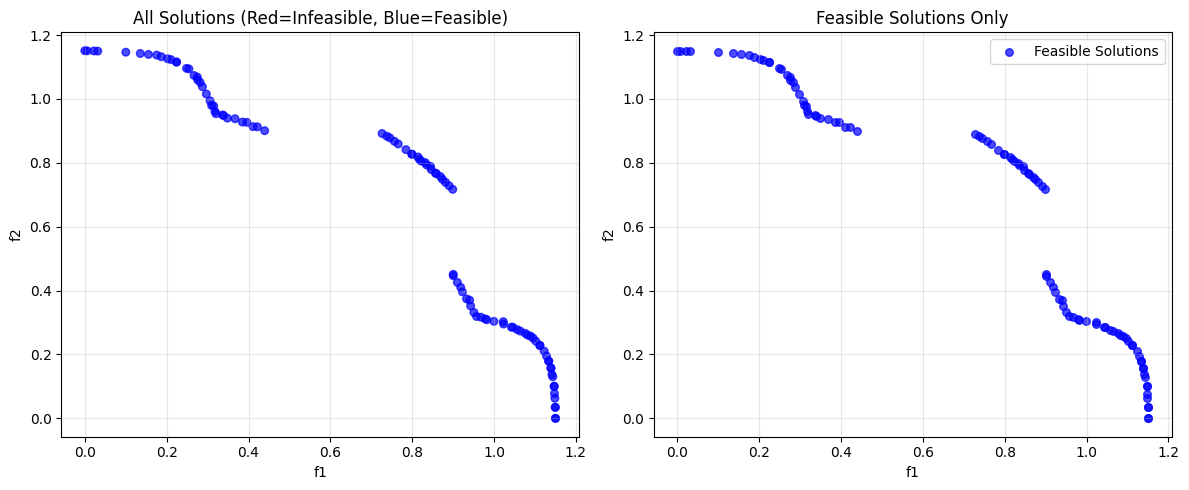


Objective values range:
f1: [0.000, 1.150]
f2: [0.000, 1.151]


In [7]:
# Instantiate classes
problem = MW7()
optimizer = CNSGA2(pop_size=100, max_gen=300, pc=0.9, pm=0.1)

print(f"Problem = {problem.name}")
print(f"Number of objectives = {problem.n_obj}")
print(f"Number of variables = {problem.n_var}")
print(f"Number of constraints = {problem.n_con}")
print(f"Lower bounds = {problem.lower}")
print(f"Upper bounds = {problem.upper}")
print()

# Solve the MW7 problem
print("Starting optimization...")
final_pop, optimum_fx, final_cv = optimizer.optimize(problem)

# Get feasible solutions only
feasible_mask = final_cv == 0
feasible_solutions = optimum_fx[feasible_mask]

print(f"\nOptimization completed!")
print(f"Total solutions: {len(optimum_fx)}")
print(f"Feasible solutions: {len(feasible_solutions)}")

# Plot results
plt.figure(figsize=(12, 5))

# Plot 1: All solutions
plt.subplot(1, 2, 1)
plt.scatter(optimum_fx[:, 0], optimum_fx[:, 1], c=['red' if cv > 0 else 'blue' for cv in final_cv], 
           alpha=0.7, s=30)
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('All Solutions (Red=Infeasible, Blue=Feasible)')
plt.grid(True, alpha=0.3)

# Plot 2: Feasible solutions only
plt.subplot(1, 2, 2)
if len(feasible_solutions) > 0:
    plt.scatter(feasible_solutions[:, 0], feasible_solutions[:, 1], 
               c='blue', alpha=0.7, s=30, label='Feasible Solutions')
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.title('Feasible Solutions Only')
    plt.grid(True, alpha=0.3)
    plt.legend()
else:
    plt.text(0.5, 0.5, 'No feasible solutions found', 
             horizontalalignment='center', verticalalignment='center')
    plt.title('No Feasible Solutions')

plt.tight_layout()
plt.show()

print(f"\nObjective values range:")
print(f"f1: [{optimum_fx[:, 0].min():.3f}, {optimum_fx[:, 0].max():.3f}]")
print(f"f2: [{optimum_fx[:, 1].min():.3f}, {optimum_fx[:, 1].max():.3f}]")

### TODO: Use Constrained NSGA-II to Solve the Assigned Constrained Multi-objective Optimization Problem (30 marks)

You will be assigned one constrained multi-objective problem (refer to the provided [Google Sheet file](https://docs.google.com/spreadsheets/d/16YdUPUa9-odsxajJ2FukP3yenpzy3Wl2gUPET8h2TDo/edit?usp=sharing) that you are required to solve using the constrained NSGA-II algorithm. 

Your task is to **implement the problem class** and **apply the constrained NSGA-II algorithm** to solve the given problem. Additionally, you need to perform parameter analysis to determine the optimal parameter settings for the algorithm, and discuss how the algorithm's parameters affect its performance. 

Finally, you should present your best results and provide some discussion.

Kumar, A., Wu, G., Ali, M. Z., Luo, Q., Mallipeddi, R., Suganthan, P. N., & Das, S. (2021). A benchmark-suite of real-world constrained multi-objective optimization problems and some baseline results. Swarm and Evolutionary Computation, 67, 100961.

In [ ]:
#-----------BEGIN-----------#
# TODO:
#   1. Implement the problem class for the assigned RCMx real-world problem
#   2. Instantiate the CNSGA2() class and the problem class
#   3. Use the constrained NSGA-II algorithm to solve the problem with a range of parameter settings
#   4. Analyze the performance of the algorithm with different parameter settings, including the 
#      population size, crossover and mutation probabilities, and maximum number of generations
#   5. Plot the final population `optimum_fx` in the objective space  using the best 
#      parameter settings that you found in Step 4.
#-----------END-----------#

In [8]:
class RCM24():
    def __init__(self):
        self.name = 'RCM24: Heat Exchanger Network Design'
        self.n_obj = 3  # f1, f2, f3
        self.n_var = 9  # x1 to x9
        self.n_con = 8  # h1 to h8 (equality constraints)
        
        # Variable bounds: [x1, x2, x3, x4, x5, x6, x7, x8, x9]
        self.lower = np.array([0, 0, 0, 0, 1000, 0, 100, 100, 100])
        self.upper = np.array([10, 200, 100, 200, 2000000, 600, 600, 600, 900])
        
    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj))
        c = np.zeros((pop_size, self.n_con))
        
        # Extract variables
        x1, x2, x3, x4, x5, x6, x7, x8, x9 = x[:, 0], x[:, 1], x[:, 2], x[:, 3], x[:, 4], x[:, 5], x[:, 6], x[:, 7], x[:, 8]
        
        # Objective functions
        f[:, 0] = 35 * (x1 ** 0.6) + 35 * (x2 ** 0.6)  # f1
        f[:, 1] = 200 * x1 * x4 - x3  # f2
        f[:, 2] = 200 * x1 * x6 - x5  # f3
        
        # Equality constraints (h = 0, violation = |h|)
        h1 = 200 * x1 * x4 - x3
        h2 = 200 * x2 * x6 - x5
        h3 = x3 - 10000 * (x7 - 100)
        h4 = x5 - 10000 * (300 - x7)
        h5 = x3 - 10000 * (600 - x8)
        h6 = x5 - 10000 * (900 - x9)
        
        # Handle logarithmic constraints with proper bounds checking
        with np.errstate(divide='ignore', invalid='ignore'):
            # For h7: x4*ln(x8-100) - x4*ln(600-x7) - x8 + x7 + 500 = 0
            term1 = np.where(x8 > 100, x4 * np.log(x8 - 100), -np.inf)
            term2 = np.where(x7 < 600, x4 * np.log(600 - x7), -np.inf)
            h7 = np.where((x8 > 100) & (x7 < 600), 
                         term1 - term2 - x8 + x7 + 500, 
                         1e6)  # Large violation for infeasible cases
            
            # For h8: x6*ln(x9-x7) - x6*ln(600) - x9 + x7 + 600 = 0
            term3 = np.where(x9 > x7, x6 * np.log(x9 - x7), -np.inf)
            term4 = x6 * np.log(600)
            h8 = np.where(x9 > x7,
                         term3 - term4 - x9 + x7 + 600,
                         1e6)  # Large violation for infeasible cases
        
        # Convert equality constraints to constraint violations
        tolerance = 1e-6  # Tolerance for equality constraints
        c[:, 0] = np.abs(h1)
        c[:, 1] = np.abs(h2) 
        c[:, 2] = np.abs(h3)
        c[:, 3] = np.abs(h4)
        c[:, 4] = np.abs(h5)
        c[:, 5] = np.abs(h6)
        c[:, 6] = np.abs(h7)
        c[:, 7] = np.abs(h8)
        
        # Apply tolerance - violations below tolerance are considered satisfied
        c = np.where(c < tolerance, 0, c)
        
        return f, c

Problem: RCM24: Heat Exchanger Network Design
Number of objectives: 3
Number of variables: 9
Number of constraints: 8
Variable bounds:
  x1: [0, 10]
  x2: [0, 200]
  x3: [0, 100]
  x4: [0, 200]
  x5: [1000, 2000000]
  x6: [0, 600]
  x7: [100, 600]
  x8: [100, 600]
  x9: [100, 900]

Starting optimization of RCM24 Heat Exchanger Network Design...
Note: This is a challenging problem with 8 equality constraints.
Generation 0: 0/150 feasible solutions
Generation 50: 0/150 feasible solutions
Generation 100: 0/150 feasible solutions
Generation 150: 0/150 feasible solutions
Generation 200: 0/150 feasible solutions
Generation 250: 0/150 feasible solutions
Generation 300: 0/150 feasible solutions
Generation 350: 0/150 feasible solutions
Generation 400: 0/150 feasible solutions
Generation 450: 0/150 feasible solutions

RCM24 Optimization Results:
Total solutions: 150
Feasible solutions: 0
Solutions with CV ≤ 0.001: 0
Solutions with CV ≤ 0.01: 0
Solutions with CV ≤ 0.1: 0
Solutions with CV ≤ 1.0: 

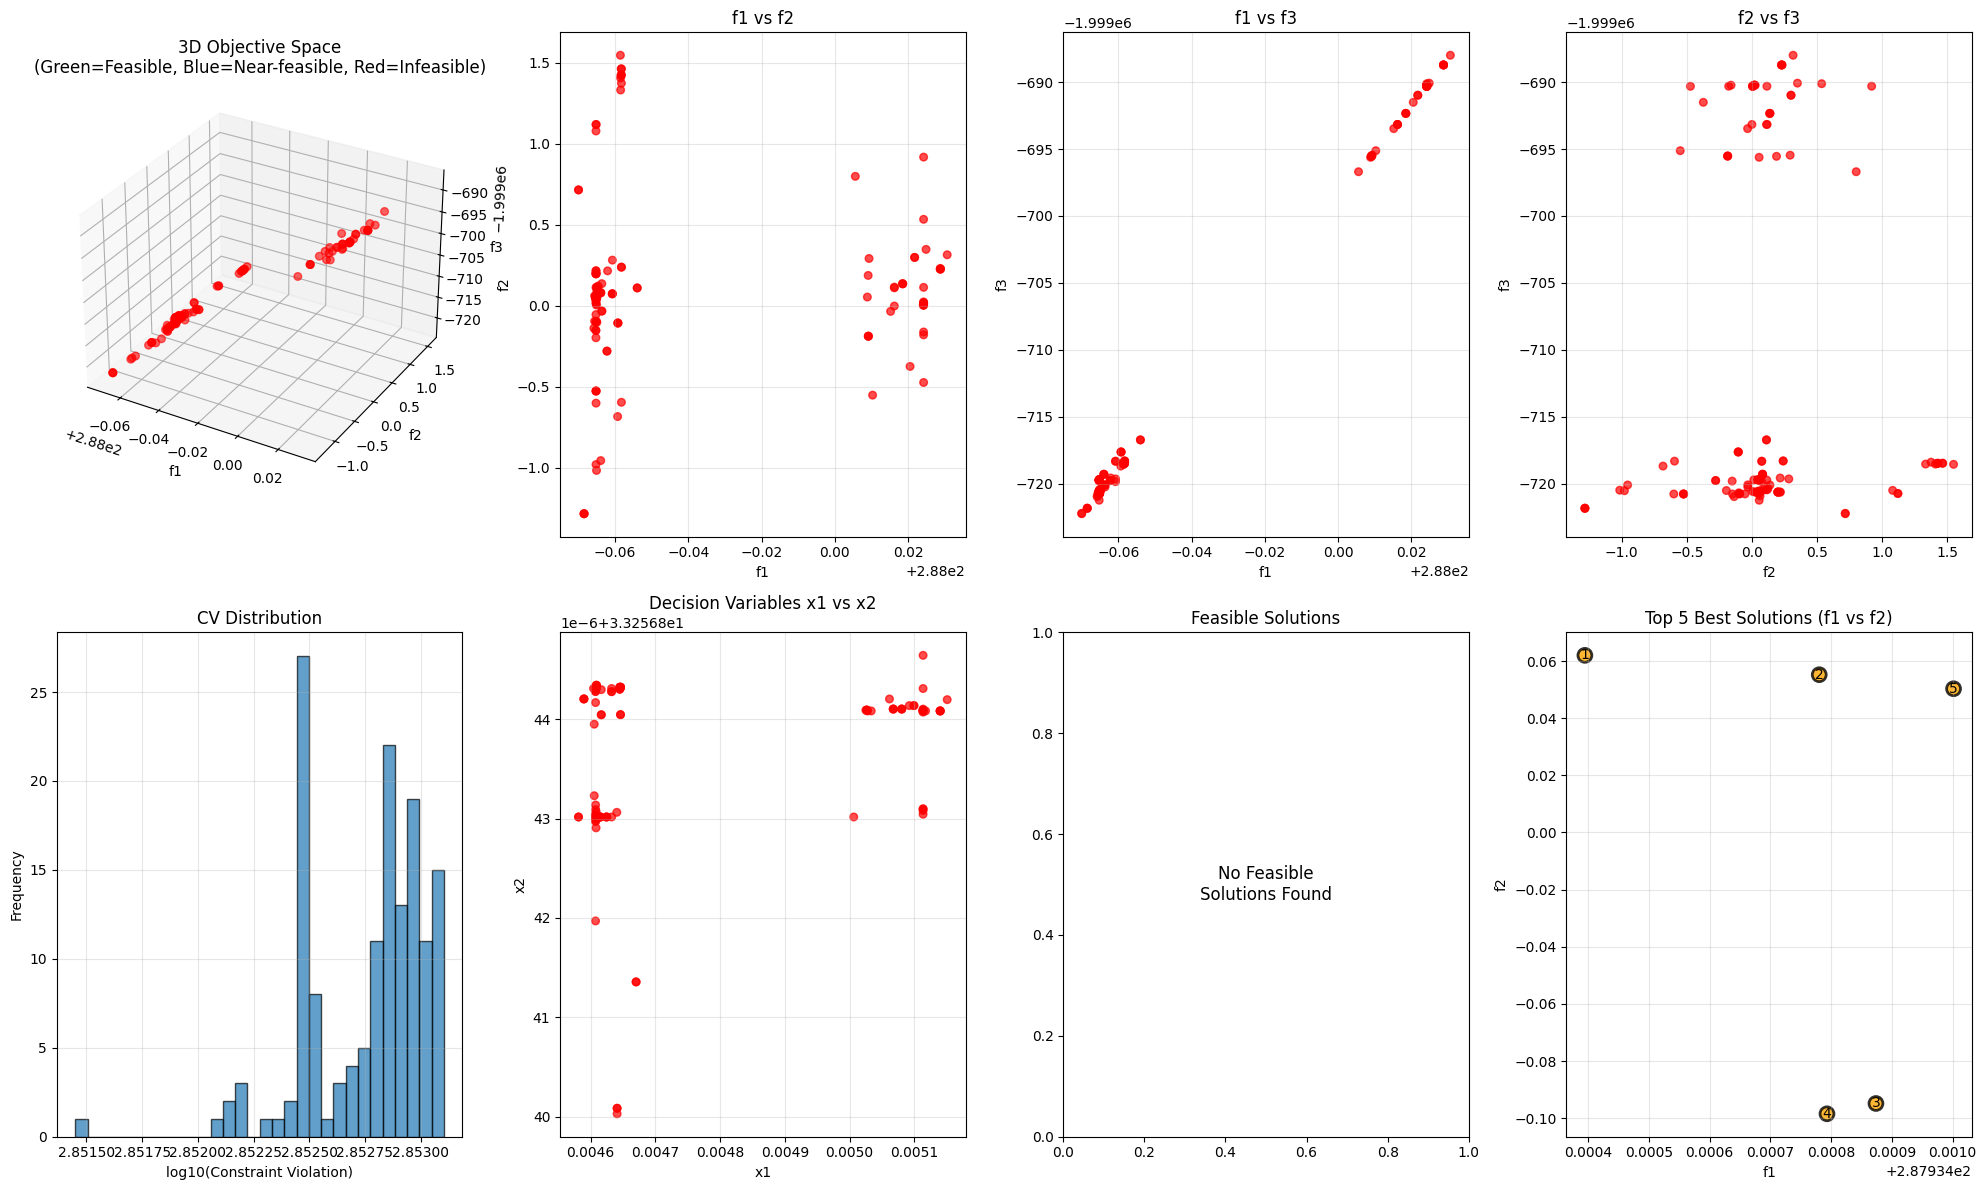


=== Recommendations for Parameter Analysis ===
Based on the results, you might want to:
1. Increase population size (current: 150) to 200-300
2. Increase maximum generations (current: 500) to 800-1000
3. Adjust mutation rate to help escape local optima
4. Use different initialization strategies for this highly constrained problem
5. Consider constraint handling techniques like penalty methods


In [9]:
# Instantiate the RCM24 problem and CNSGA2
rcm24_problem = RCM24()
rcm24_optimizer = CNSGA2(pop_size=150, max_gen=500, pc=0.9, pm=0.1)

print(f"Problem: {rcm24_problem.name}")
print(f"Number of objectives: {rcm24_problem.n_obj}")
print(f"Number of variables: {rcm24_problem.n_var}")
print(f"Number of constraints: {rcm24_problem.n_con}")
print(f"Variable bounds:")
for i in range(rcm24_problem.n_var):
    print(f"  x{i+1}: [{rcm24_problem.lower[i]:.0f}, {rcm24_problem.upper[i]:.0f}]")
print()

# Solve the RCM24 problem
print("Starting optimization of RCM24 Heat Exchanger Network Design...")
print("Note: This is a challenging problem with 8 equality constraints.")
rcm24_final_pop, rcm24_optimum_fx, rcm24_final_cv = rcm24_optimizer.optimize(rcm24_problem)

# Analyze results
rcm24_feasible_mask = rcm24_final_cv == 0
rcm24_feasible_solutions = rcm24_optimum_fx[rcm24_feasible_mask]
rcm24_feasible_pop = rcm24_final_pop[rcm24_feasible_mask]

print(f"\nRCM24 Optimization Results:")
print(f"Total solutions: {len(rcm24_optimum_fx)}")
print(f"Feasible solutions: {len(rcm24_feasible_solutions)}")

# Find near-feasible solutions (with small constraint violations)
tolerance_levels = [1e-3, 1e-2, 1e-1, 1.0]
for tol in tolerance_levels:
    near_feasible = rcm24_final_cv <= tol
    print(f"Solutions with CV ≤ {tol}: {np.sum(near_feasible)}")

# Analyze constraint violations
print(f"\nConstraint violation analysis:")
print(f"Mean CV: {rcm24_final_cv.mean():.2e}")
print(f"Min CV: {rcm24_final_cv.min():.2e}")
print(f"Max CV: {rcm24_final_cv.max():.2e}")

# Show some best solutions (lowest constraint violation)
best_indices = np.argsort(rcm24_final_cv)[:min(5, len(rcm24_final_cv))]
print(f"\nTop 5 solutions with lowest constraint violations:")
for i, idx in enumerate(best_indices):
    print(f"Solution {i+1}: CV = {rcm24_final_cv[idx]:.2e}")
    print(f"  Objectives: f1={rcm24_optimum_fx[idx, 0]:.2f}, f2={rcm24_optimum_fx[idx, 1]:.2f}, f3={rcm24_optimum_fx[idx, 2]:.2f}")
    print(f"  Variables: {rcm24_final_pop[idx]}")

# Visualization
plt.figure(figsize=(20, 12))

# Plot 1: Objective space (3D scatter)
ax1 = plt.subplot(2, 4, 1, projection='3d')
colors = ['red' if cv > 1e-3 else 'blue' if cv > 0 else 'green' for cv in rcm24_final_cv]
scatter = ax1.scatter(rcm24_optimum_fx[:, 0], rcm24_optimum_fx[:, 1], rcm24_optimum_fx[:, 2], 
                     c=colors, alpha=0.6, s=30)
ax1.set_xlabel('f1')
ax1.set_ylabel('f2')
ax1.set_zlabel('f3')
ax1.set_title('3D Objective Space\n(Green=Feasible, Blue=Near-feasible, Red=Infeasible)')

# Plot 2: f1 vs f2
plt.subplot(2, 4, 2)
plt.scatter(rcm24_optimum_fx[:, 0], rcm24_optimum_fx[:, 1], 
           c=colors, alpha=0.7, s=30)
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('f1 vs f2')
plt.grid(True, alpha=0.3)

# Plot 3: f1 vs f3
plt.subplot(2, 4, 3)
plt.scatter(rcm24_optimum_fx[:, 0], rcm24_optimum_fx[:, 2], 
           c=colors, alpha=0.7, s=30)
plt.xlabel('f1')
plt.ylabel('f3')
plt.title('f1 vs f3')
plt.grid(True, alpha=0.3)

# Plot 4: f2 vs f3
plt.subplot(2, 4, 4)
plt.scatter(rcm24_optimum_fx[:, 1], rcm24_optimum_fx[:, 2], 
           c=colors, alpha=0.7, s=30)
plt.xlabel('f2')
plt.ylabel('f3')
plt.title('f2 vs f3')
plt.grid(True, alpha=0.3)

# Plot 5: Constraint violation distribution
plt.subplot(2, 4, 5)
plt.hist(np.log10(rcm24_final_cv + 1e-10), bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('log10(Constraint Violation)')
plt.ylabel('Frequency')
plt.title('CV Distribution')
plt.grid(True, alpha=0.3)

# Plot 6: Some decision variables
plt.subplot(2, 4, 6)
plt.scatter(rcm24_final_pop[:, 0], rcm24_final_pop[:, 1], 
           c=colors, alpha=0.7, s=30)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Variables x1 vs x2')
plt.grid(True, alpha=0.3)

# Plot 7: Progress of best CV over generations (if we stored it)
plt.subplot(2, 4, 7)
if len(rcm24_feasible_solutions) > 0:
    # Parallel coordinates for feasible solutions
    norm_obj = np.zeros_like(rcm24_feasible_solutions)
    for i in range(rcm24_problem.n_obj):
        obj_min = rcm24_feasible_solutions[:, i].min()
        obj_max = rcm24_feasible_solutions[:, i].max()
        if obj_max > obj_min:
            norm_obj[:, i] = (rcm24_feasible_solutions[:, i] - obj_min) / (obj_max - obj_min)
    
    for i in range(len(norm_obj)):
        plt.plot(range(rcm24_problem.n_obj), norm_obj[i], 'g-', alpha=0.6, linewidth=1)
    
    plt.xlabel('Objective Index')
    plt.ylabel('Normalized Value')
    plt.title('Parallel Coordinates (Feasible Solutions)')
    plt.xticks(range(rcm24_problem.n_obj), ['f1', 'f2', 'f3'])
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'No Feasible\nSolutions Found', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.title('Feasible Solutions')

# Plot 8: Best solutions in objective space
plt.subplot(2, 4, 8)
if len(best_indices) > 0:
    best_solutions = rcm24_optimum_fx[best_indices]
    colors_best = ['green' if rcm24_final_cv[idx] == 0 else 'orange' for idx in best_indices]
    plt.scatter(best_solutions[:, 0], best_solutions[:, 1], 
               c=colors_best, s=100, alpha=0.8, edgecolors='black', linewidth=2)
    for i, idx in enumerate(best_indices):
        plt.annotate(f'{i+1}', (best_solutions[i, 0], best_solutions[i, 1]), 
                    fontsize=10, ha='center', va='center')
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.title('Top 5 Best Solutions (f1 vs f2)')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
